# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,Imputer

# importing dataset

In [2]:
data=pd.read_csv('ti_train.csv')

In [3]:
data
data.shape

(891, 12)

# here  inference is 60% people died and 40% people survived

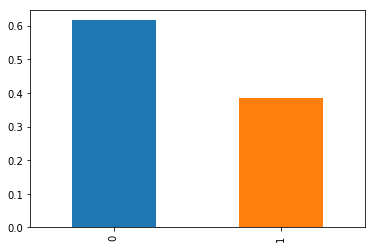

In [25]:
data.Survived.value_counts(normalize=True).plot(kind="bar")

# 80% men died while only 20% survived

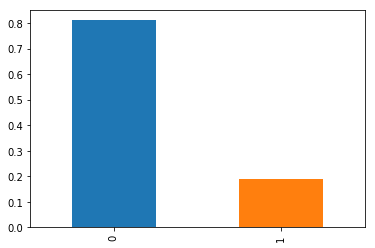

In [27]:
data.Survived[data.Sex=="male"].value_counts(normalize=True).plot(kind="bar")

# 30% men died while only 70% survived 

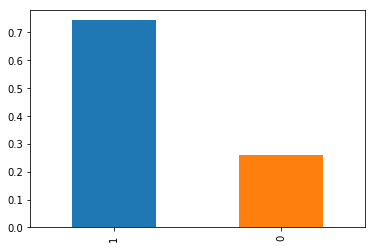

In [30]:
data.Survived[data.Sex=="female"].value_counts(normalize=True).plot(kind="bar")

# scatter plot between Survived and Age

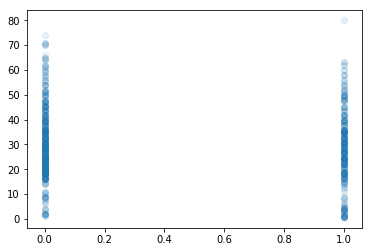

In [46]:
pt.scatter(data.Survived,data.Age,alpha=0.1)

# drop id,name and ticket even Survived column from the dataset

In [39]:
Y_train=data['Survived']

KeyError: 'Survived'

In [5]:
data=data.drop(columns=['PassengerId', 'Name','Ticket','Survived'])  

In [6]:
data=data.drop(columns=['Cabin'])  

In [21]:
data

,0,1,2,3,4,5,6
0,3,male,22,1,0,7.25,S
1,1,female,38,1,0,71.2833,C
2,3,female,26,0,0,7.925,S
3,1,female,35,1,0,53.1,S
4,3,male,35,0,0,8.05,S
5,3,male,29.6991,0,0,8.4583,Q
6,1,male,54,0,0,51.8625,S
7,3,male,2,3,1,21.075,S
8,3,female,27,0,2,11.1333,S
9,2,female,14,1,0,30.0708,C


# check which columns have null values.

In [22]:
data.columns[data.isna().any()].tolist()

[]

# finding categories does one categorical column has

In [348]:
genres = np.unique(data[6])

In [32]:
data=pd.DataFrame(data)

# fill "NAN" values

In [20]:
data[6] = data[6].fillna("S")

In [24]:
data=data.values

In [13]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer = imputer.fit(data[:,[2]])
data[:,[2]] = imputer.transform(data[:,[2]])

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# converting text values into numerical values

In [25]:
labelencoder = LabelEncoder()
data[:,6]=labelencoder.fit_transform(data[:,6])
data[:,1]=labelencoder.fit_transform(data[:,1])

# applying onehotencoder for the categoical features

In [26]:
onehotencoder = OneHotEncoder(categorical_features = [0,1,3,4,6])
data = onehotencoder.fit_transform(data).toarray()

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# removing dumy variables

In [29]:
data=data.drop(columns=[2,4,11,18,21]) 

# feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
data=Sc_x.fit_transform(data)

# training features ready

# fit the feature and the target variable into the classifier (model chosen is SVM kernal)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.2, random_state=1)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.svm import SVC  
classifier = SVC(C=10,gamma=0.03,kernel='rbf')  

In [60]:
hyperparams = [{'C':[1,10,100],'kernel':['linear']},{'C':[1,10,100],'kernel':['rbf'],'gamma':[0.05,0.04,0.03,0.01]}]

In [64]:
gridsearch = GridSearchCV(estimator=classifier,  
                     param_grid=hyperparams,
                     scoring='accuracy',
                     cv=10)

In [65]:
gridsearch=gridsearch.fit(x_train,y_train) 
best_result = gridsearch.best_score_
best_parameters = gridsearch.best_params_

C:\Users\Admin\AppData\Local\conda\conda\envs\spyder\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
best_parameters

{'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}

In [68]:
best_result

0.8174157303370787

In [90]:
acc = cross_val_score(estimator = classifier , X=x_train ,y=y_train,cv=10).mean()
print(acc)

0.817519002906327
